# Download Data

In [1]:
!gdown --id 1R8gmP0De2bnkdG50Qt2hbiXVlhAyfnyx

Downloading...
From: https://drive.google.com/uc?id=1R8gmP0De2bnkdG50Qt2hbiXVlhAyfnyx
To: D:\MachineLearning\Projects\Day_Night_Classification\day_night_images.zip

0.00B [00:00, ?B/s]
524kB [00:04, 126kB/s]
1.05MB [00:07, 131kB/s]
1.57MB [00:10, 145kB/s]
2.10MB [00:11, 178kB/s]
2.62MB [00:12, 236kB/s]
3.15MB [00:13, 289kB/s]
3.67MB [00:14, 303kB/s]
4.19MB [00:15, 365kB/s]
4.72MB [00:16, 414kB/s]
5.24MB [00:17, 443kB/s]
5.77MB [00:18, 456kB/s]
6.29MB [00:18, 579kB/s]
6.82MB [00:19, 715kB/s]
7.34MB [00:19, 857kB/s]
7.86MB [00:19, 1.01MB/s]
8.39MB [00:20, 1.16MB/s]
8.91MB [00:20, 1.29MB/s]
9.44MB [00:20, 1.49MB/s]
9.96MB [00:20, 1.67MB/s]
10.5MB [00:21, 1.91MB/s]
11.0MB [00:21, 2.16MB/s]
11.5MB [00:23, 699kB/s] 
12.6MB [00:23, 943kB/s]
13.1MB [00:23, 924kB/s]
13.6MB [00:24, 1.08MB/s]
14.2MB [00:24, 1.36MB/s]
14.7MB [00:24, 1.70MB/s]
15.2MB [00:24, 2.06MB/s]
15.7MB [00:24, 2.46MB/s]
16.3MB [00:24, 2.87MB/s]
17.3MB [00:25, 3.34MB/s]
18.4MB [00:25, 3.79MB/s]
18.9MB [00:25, 4.08MB/s]
19.4MB 

In [2]:
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [3]:
def load_dataset(im_dir):
    '''
        Load all images from im_dir and return list of 
        all images and label of each image inside im_dir
    '''
    im_list = []
    im_types = ["day","night"]

    for im_type in im_types:
        for file in glob.glob(os.path.join(im_dir,im_type,"*")):
            im = cv2.imread(file)
            im_list.append((im,im_type))
    return im_list

train_dir = "day_night_images/training/"
test_dir = "day_night_images/test/"

training_samples = load_dataset(train_dir)
test_samples = load_dataset(test_dir)

print("Total training images: ", len(training_samples))
print("Total test     images: ", len(test_samples))

Total training images:  240
Total test     images:  160


Label: night


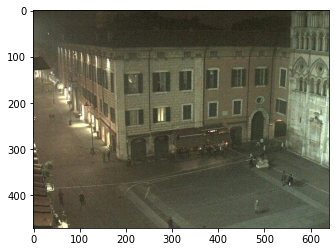

In [4]:
# check image in sample
im_day_training  = training_samples[-1][0]
label = training_samples[-1][1]
plt.imshow(im_day_training[...,::-1])
print("Label:",label)

# Standardize - Image prepocessing

In [5]:
IMG_SIZE = 256

def standardlize_input(image):
    standard_image = cv2.resize(image,(IMG_SIZE,IMG_SIZE)) # resize image
    standard_image = cv2.cvtColor(standard_image,cv2.COLOR_BGR2HSV) # covert BGR -> HSV
    return standard_image

def encode(label):
    numerical_label = 0
    if label == 'day':
        numerical_label = 1
    return numerical_label

def decode(numerical_label):
    label = "day"
    if numerical_label == 0:
        label = "night"
    return label

def standardlize(image_list):
    standard_list = []
    for sample in image_list:
        image = sample[0]
        label = sample[1]
        
        standardized_im = standardlize_input(image)
        numerical_label = encode(label)
        
        standard_list.append((standardized_im,numerical_label))
    return standard_list

In [6]:
# standardize train set 
train_standard_list = standardlize(training_samples)
test_standard_list = standardlize(test_samples)

Label: day


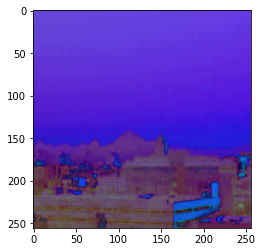

In [7]:
# check image in sample
im_day_training  = train_standard_list[0][0]
label = train_standard_list[0][1]
plt.imshow(im_day_training)
print("Label:",decode(label))

# Classification Model 
1. Use THRESHOLD DEFAULT

In [8]:
MIN_BRIGHT = 0
MAX_BRIGHT = 255

def avg_brightness(img):
    sum_brightness = np.sum(img[:,:,2])
    avg = sum_brightness/(IMG_SIZE**2)
    return avg


def estimate_label(image,threshold=100):
    avg = avg_brightness(image)
    predicted_label = 0
    if avg > threshold:
        predicted_label = 1
    return predicted_label

In [9]:
print(decode(estimate_label(train_standard_list[0][0])))
print(decode(estimate_label(train_standard_list[-1][0])))

day
night


# Classification Model 
2. Use for loop all value of threshold to find best THRESHOLD

In [10]:
def get_misclassified_images(images_set,theshold):
    misclassified_image_list = []
    for image in images_set:
        im = image[0]
        true_label = image[1]
        predicted_label = estimate_label(im,theshold)
        if predicted_label != true_label:
            misclassified_image_list.append((image,true_label,predicted_label))
    return misclassified_image_list

def Caculate_Accurancy(images_set,theshold):
    
    total_samples = len(images_set)
    misclassified_image_list = get_misclassified_images(images_set,theshold)
    num_correct_label = total_samples - len(misclassified_image_list)
    return num_correct_label/total_samples

In [13]:
start = MIN_BRIGHT
end = MAX_BRIGHT
threshold = -1
max_acc = -1
for i in range(255):
    acc = Caculate_Accurancy(train_standard_list,i)
    #print("Threshold = ", i," = = =>  Accurrancy = ",acc)
    if acc > max_acc:
        threshold = i
        max_acc = acc
print("Best threshold: ",threshold, "And best Accurrancy: ",max_acc)

Best threshold:  103 And best Accurrancy:  0.9125


# Test Model


In [15]:
Caculate_Accurancy(test_standard_list,threshold)

103
